### Descripción del proceso de unión de los datasets de metadatos y de reviews:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

Cargamos los archivos json y los concatenamos:

In [2]:
nv_hotels= pd.read_parquet('nv_hotels.parquet')

In [3]:
nv_hotels.head()

,user_id,time,rating,text,business name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,state
0,1.107179e+20,2020-01-03 03:03:00.050,5,Clean rooms no bugs or rodents great price and...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
1,1.040384e+20,2018-07-30 18:58:30.945,4,Very good for a Reno motel. Clean and family ...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
2,1.063300e+20,2018-06-18 02:48:23.106,4,Owner is very helpful to everyone he deals wit...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
3,1.089285e+20,2018-08-23 06:16:42.832,5,I give this place 5 stars because Harry and hi...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
4,1.175148e+20,2019-01-03 04:13:34.728,3,It keeps you warm and it's as clean as you'd e...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None


In [4]:
categories = nv_hotels['category'].unique()

# Imprimir los registros únicos
print(categories)

['Motel' 'Extended stay hotel' 'Hotel' 'Resort hotel' 'Lodging'
 'Pet friendly accommodation' 'Indoor lodging' 'Ski resort' 'Lodge'
 'Hot spring hotel' 'Group accommodation' 'Inn']


In [5]:
#top de los hoteles con mejores calificaciones
media_rating = nv_hotels.groupby('business name')['rating'].mean()
top_15 = media_rating.sort_values(ascending=False).head(15)
print(top_15)

business name
Fido's Kitchen                                4.950000
Allure Floatspa                               4.900000
World Famous Mustang Ranch                    4.823529
DEFY Sparks                                   4.785714
Lake Las Vegas                                4.709677
Octavius Tower Caesars                        4.705882
Stagecoach Chairlift - Heavenly Ski Resort    4.666667
Winters Creek Lodge                           4.638889
Historic Carson Hot Springs                   4.634146
Lee Canyon                                    4.627937
Aria North Valet                              4.592593
Dolphin Court Salon & Day Spa                 4.575000
Spa at Grand Sierra Resort                    4.560000
Flamingo casino Las Vegas                     4.444444
Bonnie Springs Motel                          4.444444
Name: rating, dtype: float64


### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [6]:
conteo_gmap_id = nv_hotels['business name'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

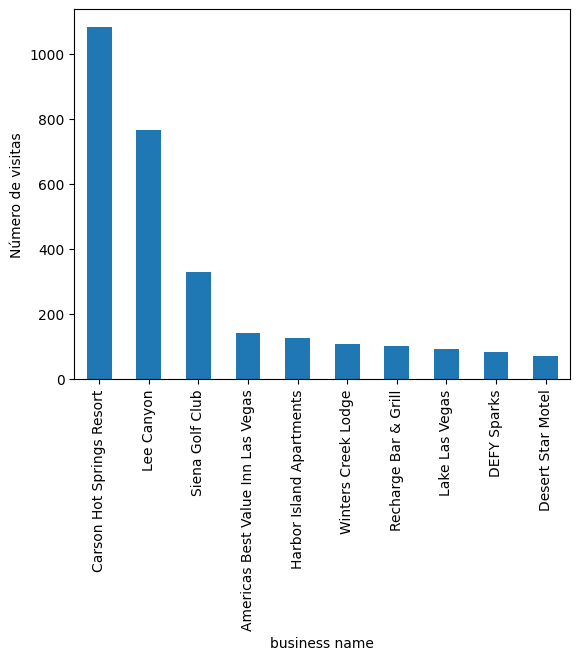

In [7]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('business name')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

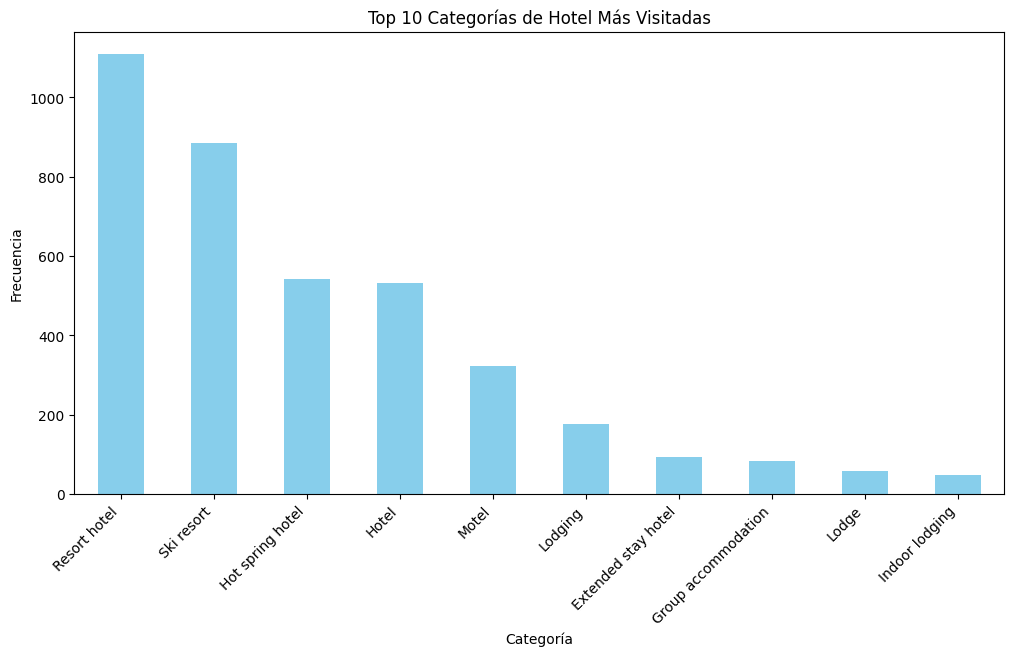

In [8]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = nv_hotels['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

<Figure size 1200x600 with 0 Axes>

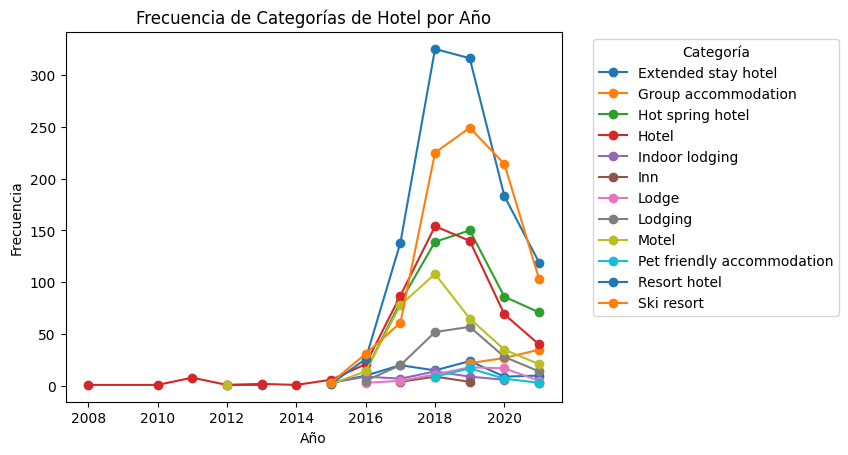

In [9]:

nv_hotels.loc[:, 'time'] = pd.to_datetime(nv_hotels['time'])

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = nv_hotels.groupby([nv_hotels['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

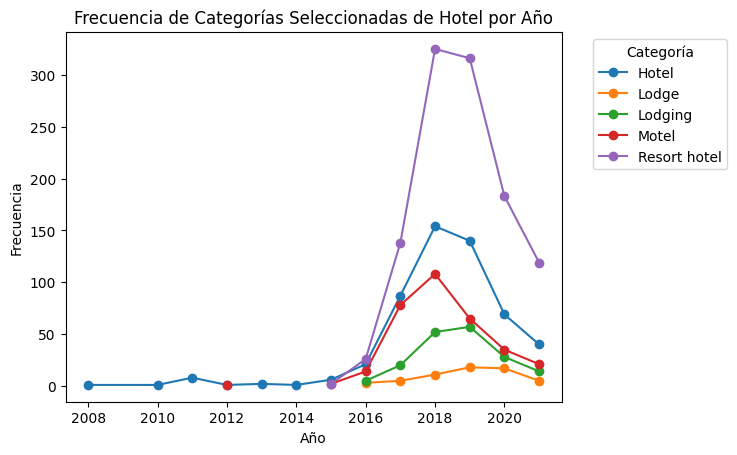

In [10]:
# Filtramos el DataFrame 
selected_categories = ['Resort hotel', 'Hotel', 'Motel', 'Lodge', 'Lodging']
filtered_by_categories = nv_hotels[nv_hotels['category'].isin(selected_categories)]

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = filtered_by_categories.groupby([filtered_by_categories['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías Seleccionadas de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rating vs Reviews: 

La mayoria de reviews son de 3.5 a 5 estrellas. Lo que da a entender opiniones variadas acerca de los negocios por parte de los clientes.

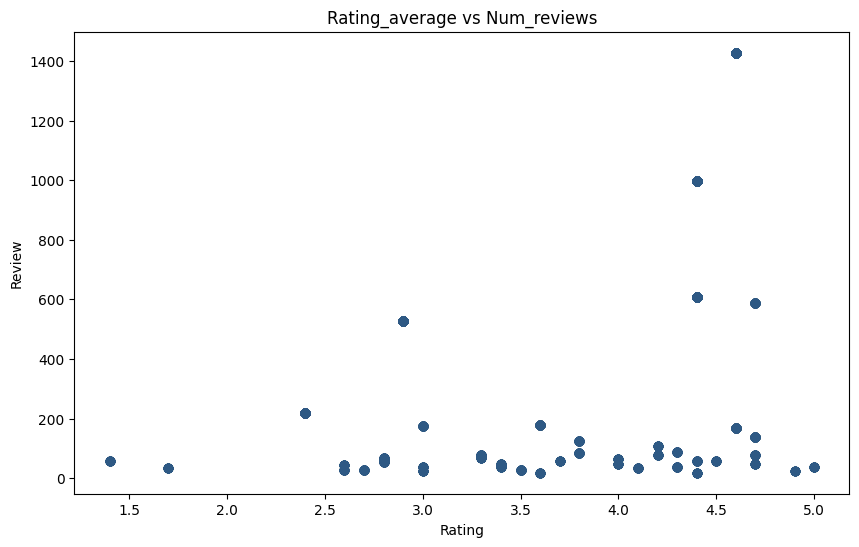

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(nv_hotels['avg_rating'], nv_hotels['num_of_reviews'], color='#2E5984') #, width=0.25
#sns.violinplot(x=metdat_sitios_fl['stars'], y=metdat_sitios_fl['review_count'], inner="quartile", palette="pastel")
plt.title('Rating_average vs Num_reviews')
plt.xlabel('Rating')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

### Numero de negocios (categoria) de la muestra de google maps en el estado de Nevada.

In [12]:
columns_to_count = ['category']

for column in columns_to_count:
    counts = nv_hotels[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'category':
category
Resort hotel                  1109
Ski resort                     886
Hot spring hotel               541
Hotel                          531
Motel                          324
Lodging                        176
Extended stay hotel             93
Group accommodation             84
Lodge                           59
Indoor lodging                  48
Pet friendly accommodation      36
Inn                             20
Name: count, dtype: int64


### Verificación de Outliers en rating y reviews

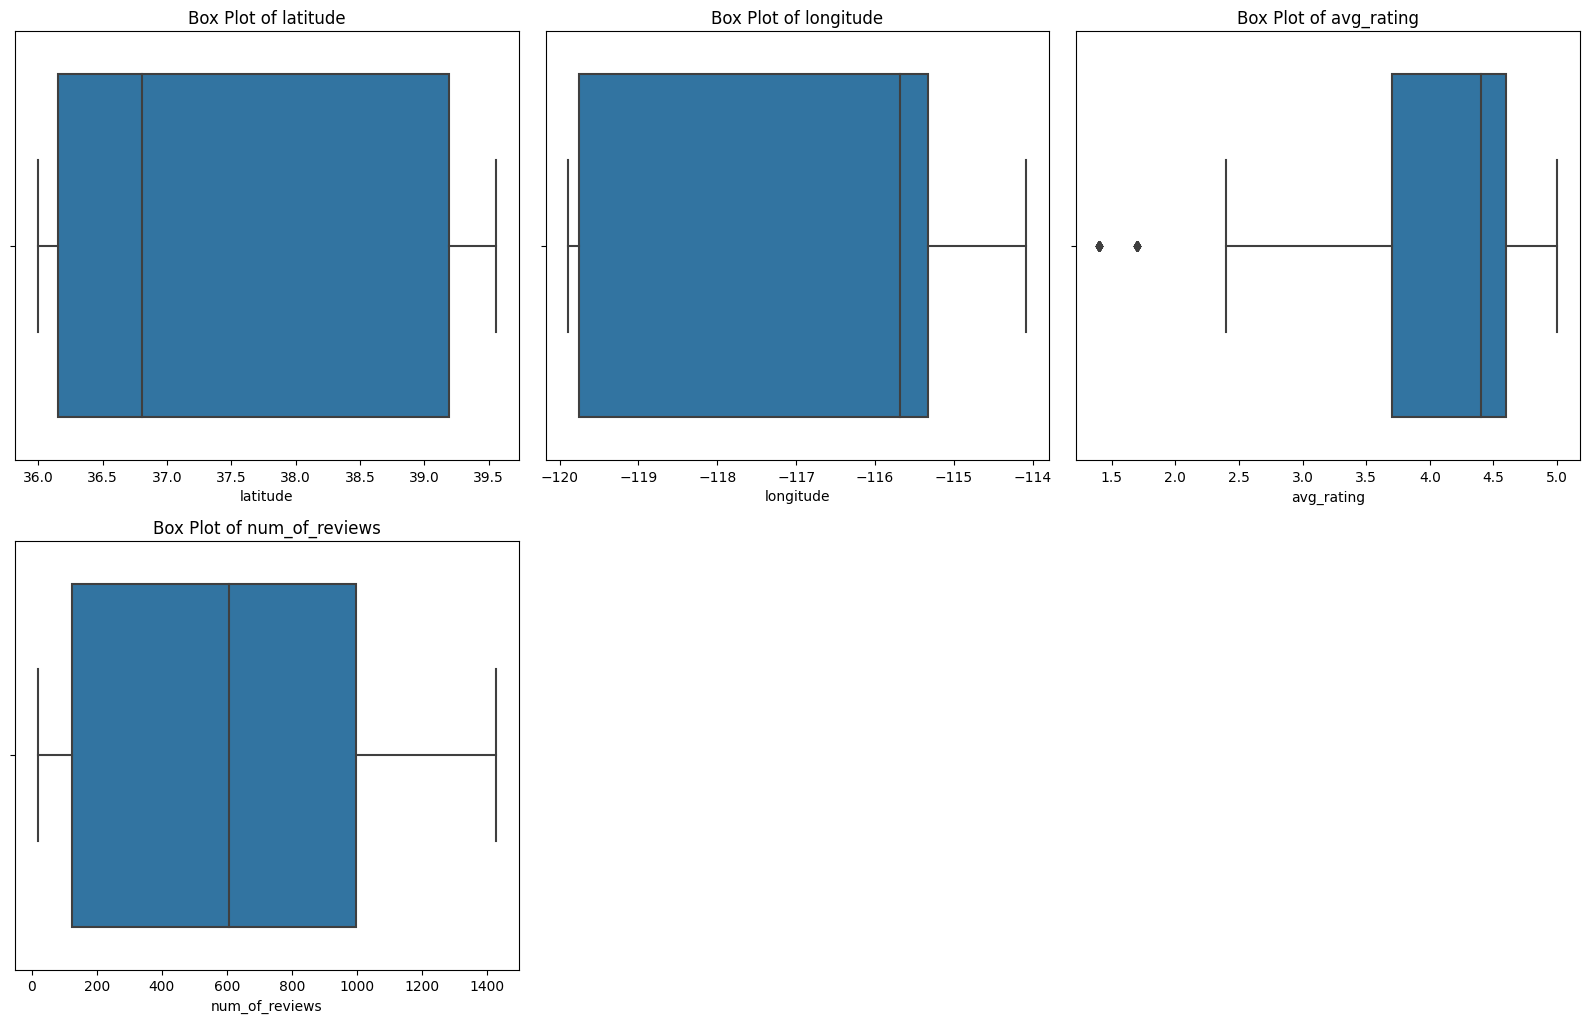

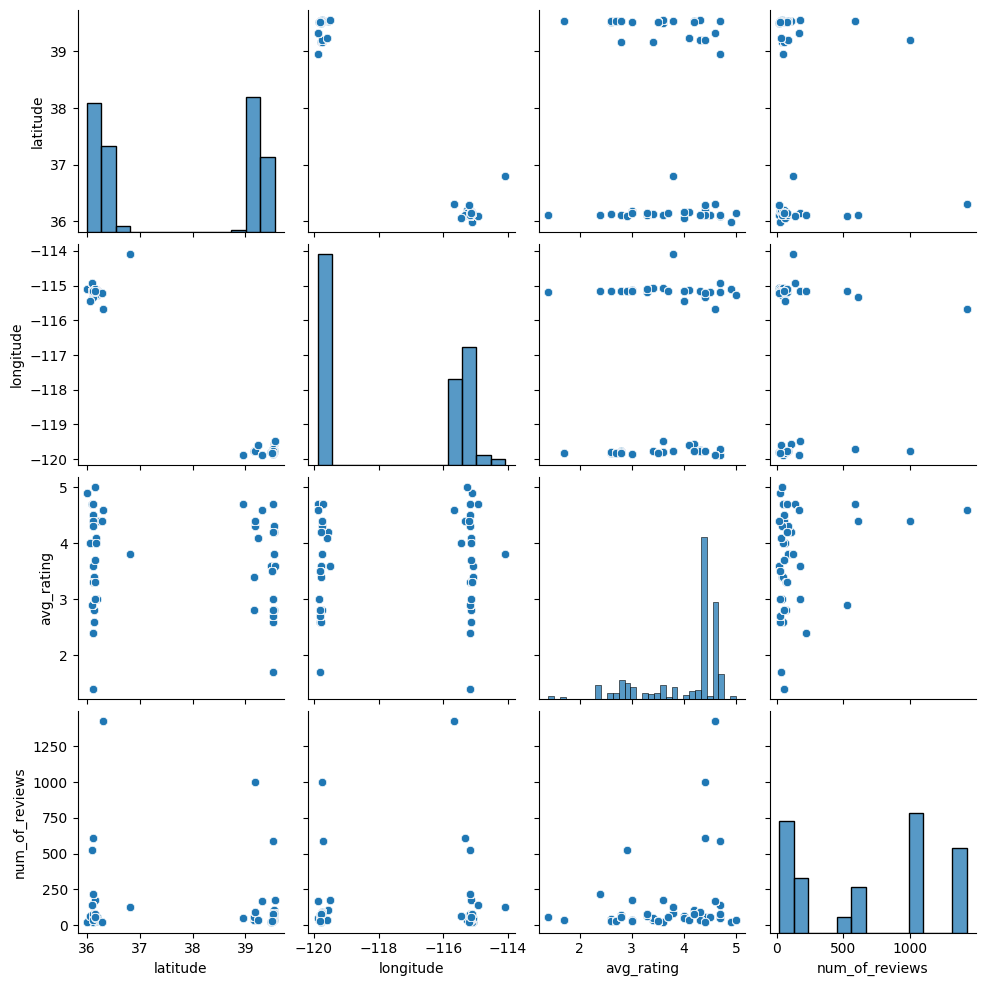

In [13]:
numerical_columns = ['latitude'	,'longitude','avg_rating','num_of_reviews']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=nv_hotels[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(nv_hotels[numerical_columns])
plt.show()

### Categorías más comentadas:

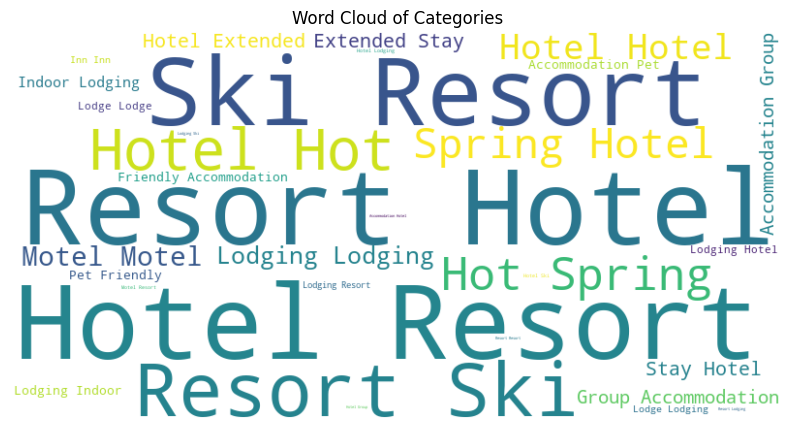

In [14]:
from wordcloud import WordCloud

nv_hotels.loc[:, 'category'] = nv_hotels['category'].str.title()  # Apply .str.title() to the 'category' Series
text = ' '.join(nv_hotels['category'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()